# Importação de bibliotecas


In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
import mplcyberpunk

# Coletando as cotações históricas

In [20]:
tickers = ['^BVSP', '^GSPC', 'BRL=X']

In [21]:
dados_mercado = yf.download(tickers, period = '6mo')

dados_mercado = dados_mercado['Adj Close']
dados_mercado

[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.000000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.000000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.000000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.000000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.000000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.000000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.000000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.000000,5408.419922


# Tratamento de dados

In [22]:
dados_mercado.isnull().sum()

Ticker
BRL=X    1
^BVSP    3
^GSPC    5
dtype: int64

In [23]:
dados_mercado = dados_mercado.dropna()

In [24]:
dados_mercado.columns = ['DOLAR', 'IBOVESPA', 'S&P500']

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0,5117.089844
...,...,...,...
2024-09-03 00:00:00+00:00,5.61510,134353.0,5528.930176
2024-09-04 00:00:00+00:00,5.64750,136111.0,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0,5503.410156


# Criar gráficos de performace

In [25]:
plt.style.use('cyberpunk')

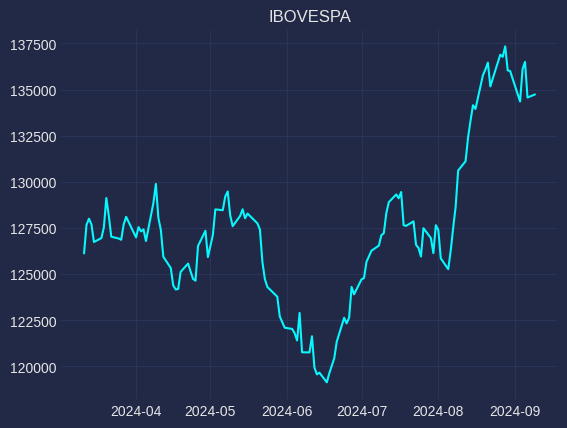

In [26]:
plt.plot(dados_mercado['IBOVESPA'])
plt.title('IBOVESPA')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/ibovespa.png')


plt.show()


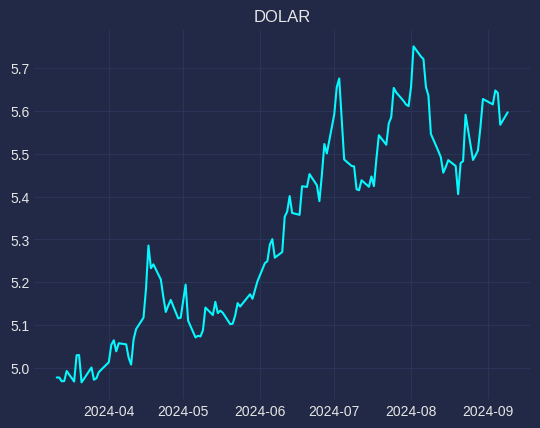

In [27]:
plt.plot(dados_mercado['DOLAR'])
plt.title('DOLAR')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/dolar.png')


plt.show()

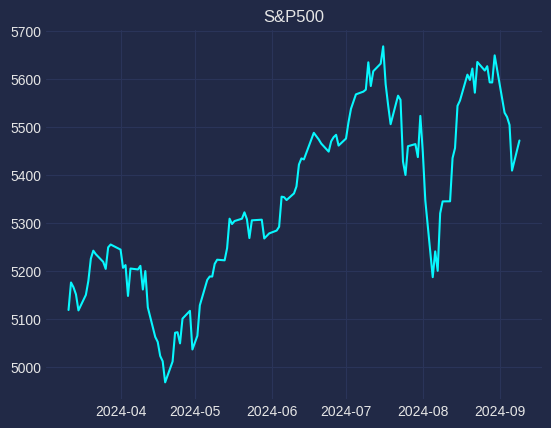

In [28]:
plt.plot(dados_mercado['S&P500'])
plt.title('S&P500')

diretorio_figuras = '/home/petee/kaio_personal/python_applications/financas_minicurso/graficos'
plt.savefig(diretorio_figuras + '/s&p500.png')


plt.show()

# Calcular retornos diários

In [32]:
retornos = {}

retornos['diarios'] = dados_mercado.pct_change(periods = 5)

retornos['diarios'].head(10)

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,NaN,NaN,NaN
2024-03-13 00:00:00+00:00,NaN,NaN,NaN
2024-03-14 00:00:00+00:00,NaN,NaN,NaN
2024-03-15 00:00:00+00:00,NaN,NaN,NaN
2024-03-18 00:00:00+00:00,-0.001907,0.006581,0.006151
2024-03-19 00:00:00+00:00,0.010447,-0.001089,0.000626
2024-03-20 00:00:00+00:00,0.012337,0.008742,0.011482
2024-03-21 00:00:00+00:00,-0.000604,0.003673,0.017678


In [35]:
retornos['diarios'] = dados_mercado.pct_change()

retornos['diarios']

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-03 00:00:00+00:00,-0.002239,-0.012139,-0.021151
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018


In [36]:
# código para verificar o valor de fehcamento, por volta das 19h

retornos['dolar'] = retornos['diarios']['DOLAR'].iloc[-1]
retornos['ibovespa'] = retornos['diarios']['IBOVESPA'].iloc[-1]
retornos['sp'] = retornos['diarios']['S&P500'].iloc[-1]

In [37]:
retornos['dolar'] = str(round(retorno_dolar * 100, 2)) + '%'
retornos['ibovespa'] = str(round(retorno_ibovespa * 100, 2)) + '%'
retornos['sp'] = str(round(retorno_sp * 100, 2)) + '%'

In [39]:
retornos

{'diarios':                               DOLAR  IBOVESPA    S&P500
 Date                                                   
 2024-03-11 00:00:00+00:00       NaN       NaN       NaN
 2024-03-12 00:00:00+00:00 -0.000028  0.012242  0.011202
 2024-03-13 00:00:00+00:00 -0.001748  0.002647 -0.001925
 2024-03-14 00:00:00+00:00  0.000101 -0.002469 -0.002871
 2024-03-15 00:00:00+00:00  0.004729 -0.007424 -0.006483
 ...                             ...       ...       ...
 2024-09-03 00:00:00+00:00 -0.002239 -0.012139 -0.021151
 2024-09-04 00:00:00+00:00  0.005770  0.013085 -0.001603
 2024-09-05 00:00:00+00:00 -0.000974  0.002873 -0.003018
 2024-09-06 00:00:00+00:00 -0.013205 -0.014139 -0.017260
 2024-09-09 00:00:00+00:00  0.005227  0.001226  0.011580
 
 [124 rows x 3 columns],
 'dolar': '0.52%',
 'ibovespa': '0.12%',
 'sp': '1.16%'}